# Filter *.h5 files & background correction
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.
This notebook as to be reloaded before analysing a new group of data!

## Load cell.h5 files

Choose/insert a directory for the cell files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.h5 files in the directory will be loaded for the analysis.

In [1]:
from pySPT.widgets.widgetNotebooks import init_filter_notebook
from pySPT.widgets.widgetNotebooks import init_track_stats_widget_arrangement
from pySPT.widgets.widgetNotebooks import init_save_track_stats
from pySPT.widgets.widgetNotebooks import init_save_filtered_analysis
from pySPT.widgets.widgetNotebooks import init_save_filtered_trc
from pySPT.widgets import widgetLoadHdf5
from pySPT.widgets import loadHdf5
from pySPT.widgets import saveStatistics
from pySPT.widgets import saveFiltered
from pySPT.analysis import cell
from pySPT.analysis import trajectory
from pySPT.analysis import coverSlip
from pySPT.analysis import trajectoryStatistics
from tqdm import tqdm_notebook as tqdm
import os
import warnings
warnings.filterwarnings('ignore')
widget_load_hdf5 = widgetLoadHdf5.WidgetLoadHdf5()
load_hdf5 = loadHdf5.LoadHdf5()
cover_slip = coverSlip.CoverSlip()
track_stats = trajectoryStatistics.TrajectoryStatistics()
display(widget_load_hdf5.dir_box, widget_load_hdf5.dir_button)
widget_load_hdf5.dir_button.on_click(widget_load_hdf5.open_dir)
widget_load_hdf5.dir_box.observe(widget_load_hdf5.change_dir_box)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [2]:
def initialize(event):
    init_filter_notebook(cover_slip, widget_load_hdf5, load_hdf5, is_cell=True)
    track_stats.cells = cover_slip.cells
    track_stats.cell_trajectories = cover_slip.cell_trajectories
    track_stats.cell_sizes = [cell.size for cell in cover_slip.cells]
    track_stats.create_filtered_framework()
display(widget_load_hdf5.init_cells_button)
widget_load_hdf5.init_cells_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')

203 203
198 198
Initialization took 3.848860263824463 s


## Load background.h5 files

Choose/insert a directory for the background files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.h5 files in the directory will be loaded for the analysis. Background correction is recommended but optional.

In [3]:
display(widget_load_hdf5.dir_box_bg, widget_load_hdf5.dir_button_bg)
widget_load_hdf5.dir_box_bg.observe(widget_load_hdf5.change_dir_box_bg)
widget_load_hdf5.dir_button_bg.on_click(widget_load_hdf5.open_dir_bg)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [4]:
def initialize(event):
    init_filter_notebook(cover_slip, widget_load_hdf5, load_hdf5, is_cell=False)
    track_stats.backgrounds = cover_slip.backgrounds
    track_stats.background_trajectories = cover_slip.background_trajectories
    track_stats.bg_sizes = [background.size for background in cover_slip.backgrounds]
display(widget_load_hdf5.init_background_button)
widget_load_hdf5.init_background_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')

## Filter for parameters

Floating point numbers have to be separated with a dot (e.g. 2.123). If no filter parameters or invalid parameters are given, the min and max values will be set automatically. All boxes that are checked will be included in the filtered data. If one wants to filter multiple times, the JNB has to be restarted.

In [5]:
def filter(event):
    widget_load_hdf5.create_clear_output()
    display(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_not_successful_check_box, widget_load_hdf5.filter_button)
    #init_track_stats_widget_arrangement(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.filter_button, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_not_successful_check_box)
    #init_track_stats_widget_arrangement(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.filter_button, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_not_successful_check_box)
    track_stats.run_statistics(widget_load_hdf5.min_length_box.value, widget_load_hdf5.max_length_box.value, widget_load_hdf5.min_D_box.value, widget_load_hdf5.max_D_box.value, widget_load_hdf5.immob_type_check_box.value,  widget_load_hdf5.confined_type_check_box.value, widget_load_hdf5.free_type_check_box.value, widget_load_hdf5.analyse_not_successful_check_box.value)
    track_stats.run_diffusion_histogram(widget_load_hdf5.bin_size_box.value, plot=False)
display(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_not_successful_check_box, widget_load_hdf5.filter_button)
#widget_load_hdf5.min_length_box.observe(widget_load_hdf5.init_cells_button)
widget_load_hdf5.filter_button.on_click(filter)
#init_track_stats_widget_arrangement(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.filter_button, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_not_successful_check_box)

Text(value='min length', description='Trajectory', placeholder='Type something', style=DescriptionStyle(descri…

Text(value='max length', description='Trajectory', placeholder='Type something', style=DescriptionStyle(descri…

Text(value='0', description='Diffusion coefficient', placeholder='Type something', style=DescriptionStyle(desc…

Text(value='max value', description='Diffusion coefficient', placeholder='Type something', style=DescriptionSt…

Checkbox(value=True, description='Immobile')

Checkbox(value=True, description='Confined')

Checkbox(value=True, description='Free')

Checkbox(value=False, description='Type determination not successful')

Button(description='apply filter', style=ButtonStyle(), tooltip='apply filter')

min trajectory length: 20
max trajectory length: 467
min diffusion coefficient: 0.0 [μm²/s]
max diffusion coefficient: 0.2937092778895769 [μm²/s]
Initialization took 0.015610456466674805 s
Filter for immobile.
Filter for confined.
Filter for free.
Filter for type determination successful only.
14.33 % are immobile
16.33 % are confined
69.34 % are free
Trajectories included: 349
Trajectories excluded: 52


## Calculate dynamic localization error 

For each cell, a dynamic localization error based on the filtered trajectories is calculated (formula: X. Michalet, Phys. Rev. 2010, 82, 041914).

In [6]:
def calc(event):
    widget_load_hdf5.create_clear_output()
    display(widget_load_hdf5.calc_sigma_dyn_button)
    for cell_idx in range(len(track_stats.cell_trajectories_filtered)):
        print("{}: {} \u03BCm".format(track_stats.cells[cell_idx].name, track_stats.sigma_dyns[cell_idx]))
display(widget_load_hdf5.calc_sigma_dyn_button)
widget_load_hdf5.calc_sigma_dyn_button.on_click(calc)

Button(description='calc', style=ButtonStyle(), tooltip='dynamic localization error')

cell01: 0.032869004826870774 μm
cell02: 0.029572609778673983 μm


## Choose trajectory to plot

Choose a cell. If one wants to plot multiple times, choose a new cell and/or trajectory reload the plotting cell by clicking in the cell and pressing strg+enter.

In [7]:
def dropdown(event):
    widget_load_hdf5.cell_options = widget_load_hdf5.get_cell_names(cover_slip.cells, track_stats.cell_trajectories_filtered)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_cells)

Dropdown(description='Number:', options=(), value=None)

Choose a trajectory.

In [8]:
def dropdown(event):      
    for cell in cover_slip.cells:
        if cell.name == widget_load_hdf5.drop_down_cells.value:
            target_cell = cover_slip.cells.index(cell)
            widget_load_hdf5.trajectory_options = track_stats.cell_trajectories_filtered_index[target_cell]
            widget_load_hdf5.drop_down_trajectories.options = widget_load_hdf5.trajectory_options
widget_load_hdf5.drop_down_cells.observe(dropdown)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_trajectories)

Dropdown(description='Number:', options=(), value=None)

Button(description='plot', style=ButtonStyle(), tooltip='plot chosen trajectory')

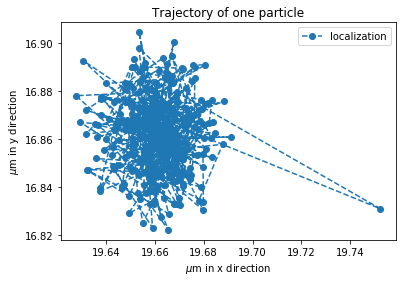

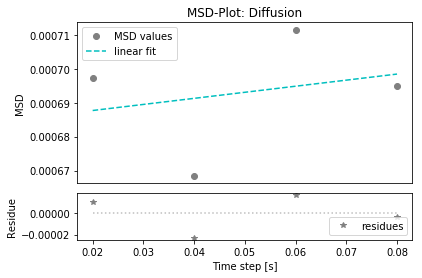

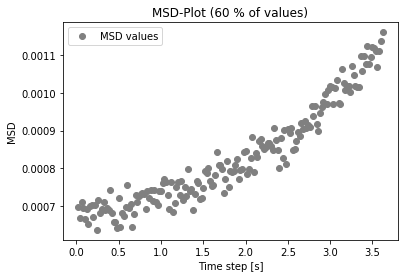

Number: 4
Trajectory length: 303
Diffusion coefficient: 4.475514937918179e-05 μm²/s
MSD0: 0.0006841278736680477 μm²
chi² linear fit: 1.3069802873322092e-06 μm⁴
sigma dynamic: 0.0 μm
Type immobile: True


In [9]:
def plot_trajectory(event):
    widget_load_hdf5.create_clear_output()
    display(widget_load_hdf5.plot_button)
    cover_slip.plot_trajectory(widget_load_hdf5.drop_down_cells.value, widget_load_hdf5.drop_down_trajectories.value)
display(widget_load_hdf5.plot_button)
widget_load_hdf5.plot_button.on_click(plot_trajectory)

## Plot diffusion histogram

Plot the normalized frequency in % against the diffusion coefficients (semi log scale). Diffusion coefficients <= 0 are neglected, because the logarithm is not defined in this interval.

In [10]:
display(widget_load_hdf5.bin_size_box)

Text(value='0.1', description='bin size', placeholder='size for log10(D) histogram', style=DescriptionStyle(de…

Button(description='plot', style=ButtonStyle(), tooltip='plot diffusion coefficients')

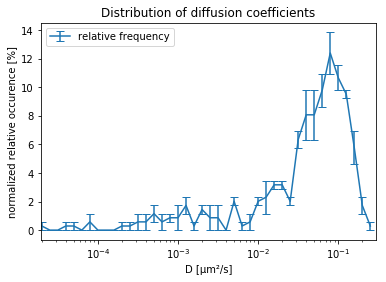

In [11]:
def plot_diffusions(event):
    widget_load_hdf5.create_clear_output()
    display(widget_load_hdf5.plot_diffusions_button)
    track_stats.run_diffusion_histogram(widget_load_hdf5.bin_size_box.value)
display(widget_load_hdf5.plot_diffusions_button)
widget_load_hdf5.plot_diffusions_button.on_click(plot_diffusions)

## Save Analysis

Choose a directory, folder name and a file name for the statistics h5 file. If you want to save the filtered dataset, check the box! The filtered dataset will be saved in the same folder as the statistics h5 file.

In [12]:
display(widget_load_hdf5.save_dir_button, widget_load_hdf5.save_dir_box, widget_load_hdf5.save_folder_name_box, widget_load_hdf5.save_name_box, widget_load_hdf5.filtered_dataset_checkbox, widget_load_hdf5.hmm_trc_checkbox)
widget_load_hdf5.save_dir_button.on_click(widget_load_hdf5.save_open_dir)
widget_load_hdf5.save_dir_box.observe(widget_load_hdf5.change_save_dir_box)

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

Text(value='', description='directory', placeholder='directory for filtered data', style=DescriptionStyle(desc…

Text(value='190619_filtered', description='folder name', placeholder='name of folder', style=DescriptionStyle(…

Text(value='statistics', description='file name', placeholder='name for statistics .h5 file', style=Descriptio…

Checkbox(value=True, description='Save filtered dataset')

Checkbox(value=True, description='Save filtered .trc files')

In [13]:
def save(event):
    widget_load_hdf5.create_clear_output()
    display(widget_load_hdf5.save_button)
    h5_stats = saveStatistics.SaveStatistics()
    if os.path.exists(widget_load_hdf5.save_dir_box.value + "\\" + widget_load_hdf5.save_folder_name_box.value):
        print("Directory already exsists. Please choose an other directory or folder name.")
    else:
        os.makedirs(widget_load_hdf5.save_dir_box.value + "\\" + widget_load_hdf5.save_folder_name_box.value)
        if widget_load_hdf5.save_dir_box.value:
            init_save_track_stats(h5_stats, track_stats, widget_load_hdf5.save_dir_box.value, widget_load_hdf5.save_folder_name_box.value, widget_load_hdf5.save_name_box.value)
            if widget_load_hdf5.filtered_dataset_checkbox.value:
                track_stats.filter_cell_trc()
                print("The filtered dataset will be saved.")
                for cell_index in tqdm(range(len(track_stats.cells))):
                    if track_stats.cell_trajectories_filtered[cell_index]:
                        init_save_filtered_analysis(cover_slip, cell_index, track_stats, widget_load_hdf5.save_dir_box.value, widget_load_hdf5.save_folder_name_box.value)
            if widget_load_hdf5.hmm_trc_checkbox.value:
                print("The trc files of the filtered dataset will be saved.")
                track_stats.filter_cell_trc()
                for cell_index in tqdm(range(len(track_stats.cells))):
                    if track_stats.cell_trajectories_filtered[cell_index]:
                        init_save_filtered_trc(track_stats, widget_load_hdf5.save_dir_box.value, widget_load_hdf5.save_folder_name_box.value)
        else:
            print("Please choose a directory")
display(widget_load_hdf5.save_button) 
widget_load_hdf5.save_button.on_click(save)

Button(description='save', style=ButtonStyle(), tooltip='save statistics')

The filtered dataset will be saved.
